## Imoprt Libraries

In [21]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import tensorflow as tf
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D,Activation,Input
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

## Data Loading

In [22]:
data_dir=r"Train"
data=[]
for file in os.listdir(data_dir):
    data+=[file]
print(data)
print(len(data))

['cardiovascular', 'No_cardiovascular']
2


## Data Preprocessing

In [23]:
img_height,img_width=224,224
batch_size=20

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
test_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation')

Found 1907 images belonging to 2 classes.
Found 815 images belonging to 2 classes.


## Applying CNN Algorithm

In [25]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(img_height,img_width, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 96)      

model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist=model.fit(train_generator,epochs=20,validation_data=test_generator,verbose=1)

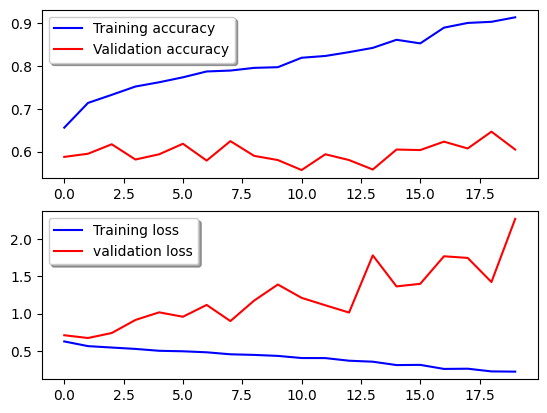

In [27]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['loss'], color='b', label="Training loss")
ax[1].plot(hist.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [28]:
model.evaluate(test_generator)
model.save("models/CNN.h5")

41/41 [==============================] - 30s 738ms/step - loss: 2.2707 - accuracy: 0.6049


## Applying MobileNet Algorithm

In [29]:
base_model = tf.keras.applications.MobileNet(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model1 = Sequential()
model1.add(base_model)
model1.add(GlobalAveragePooling2D())
model1.add(Dense(64, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))
model1.add(Dense(2, activation='sigmoid'))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 64)                65600     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

In [30]:
model1.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist1=model1.fit_generator(train_generator,epochs=20,validation_data=test_generator,verbose=1)

C:\Users\0427\AppData\Local\Temp\ipykernel_12320\4244930103.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist1=model1.fit_generator(train_generator,epochs=20,validation_data=test_generator,verbose=1)


Epoch 1/20
96/96 [==============================] - 260s 3s/step - loss: 0.4821 - accuracy: 0.8060 - val_loss: 0.4602 - val_accuracy: 0.8074
Epoch 2/20
96/96 [==============================] - 247s 3s/step - loss: 0.2835 - accuracy: 0.8804 - val_loss: 0.5476 - val_accuracy: 0.7693
Epoch 3/20
96/96 [==============================] - 249s 3s/step - loss: 0.2041 - accuracy: 0.9182 - val_loss: 0.7006 - val_accuracy: 0.7681
Epoch 4/20
96/96 [==============================] - 251s 3s/step - loss: 0.1434 - accuracy: 0.9439 - val_loss: 0.8306 - val_accuracy: 0.7656
Epoch 5/20
96/96 [==============================] - 243s 3s/step - loss: 0.1150 - accuracy: 0.9533 - val_loss: 0.5350 - val_accuracy: 0.8135
Epoch 6/20
96/96 [==============================] - 244s 3s/step - loss: 0.0488 - accuracy: 0.9843 - val_loss: 1.4415 - val_accuracy: 0.7055
Epoch 7/20
96/96 [==============================] - 245s 3s/step - loss: 0.0944 - accuracy: 0.9633 - val_loss: 1.0070 - val_accuracy: 0.7755
Epoch 8/20
96

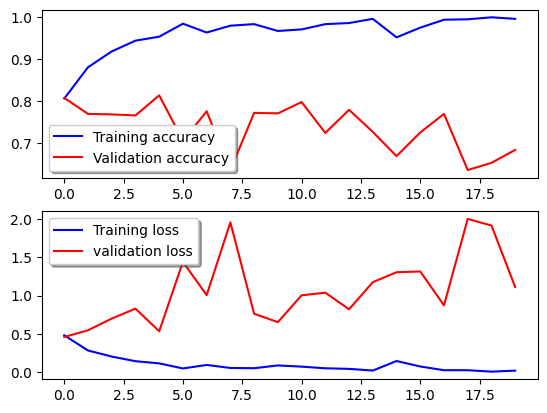

In [31]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist1.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(hist1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist1.history['loss'], color='b', label="Training loss")
ax[1].plot(hist1.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

In [32]:
model1.evaluate(test_generator)
model1.save("models/MobileNet.h5")

41/41 [==============================] - 37s 906ms/step - loss: 1.1128 - accuracy: 0.6834


## Clacate the Accurarcy

In [33]:
Accuracy = []

for i in [hist, hist1]:
    x = i.history.get('accuracy')[-1]
    Accuracy.append(x)

Accuracy

[0.9134766459465027, 0.9958049058914185]

## Classification Output

1/1 [==============================] - 1s 674ms/step
[0.06398821 0.96030456]


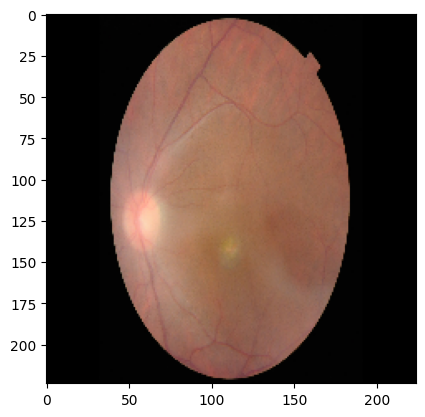

Prediction: No_cardiovascular


In [34]:
from skimage import io
from tensorflow.keras.preprocessing import image

img = image.load_img(r'Train\cardiovascular\15.jpg', grayscale=False, target_size=(224,224))
show_img=image.load_img(r'Train\cardiovascular\15.jpg', grayscale=False, target_size=(224, 224))
data = data
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model1.predict(x)
print(custom[0])


plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',data[ind])